## **Exploratory Data Analysis (EDA)**

This notebook presents our **data cleaning, distribution plots, correlation analysis,** and **geospatial exploration** for earthquake data in the Philippines from 2016 to 2024.

The objective is to analyze and understand:
- The distribution of earthquake magnitudes and depths,
- Temporal trends and patterns,
- Spatial clustering and epicenter hotspots.

Through this analysis, we aim to uncover key insights and detect anomalies that can guide subsequent clustering and modeling efforts.

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# For inline plots
%matplotlib inline

### **Data Source**

The dataset comes from PHIVOLCS (Philippine Institute of Volcanology and Seismology), covering recorded earthquakes from 2016 to November 30, 2024.

| Column Name         | Description                                                  |
|---------------------|--------------------------------------------------------------|
| Date_Time_PH        | The local date and time of each quake.                       |
| Latitude & Longitude| The location of the epicenter.                               |
| Depth_In_Km         | How deep the earthquake originated beneath the earth's surface. |
| Magnitude           | Magnitude of the quake (e.g., Richter scale or ML).          |
| Location            | A textual description of where the epicenter is relative to known towns/cities. |


In [5]:
# Load Data

df = pd.read_csv('../data/phivolcs_earthquake_data.csv')
df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2016-01-01 00:40:00,17.34,120.30,023,3.0,015 km N 87° W of San Esteban (Ilocos Sur)
1,2016-01-01 05:06:00,14.65,123.12,017,3.3,054 km N 42° E of Paracale (Camarines Norte)
2,2016-01-01 13:24:00,09.76,125.46,012,2.4,005 km S 42° W of Surigao City
3,2016-01-01 15:01:00,17.30,120.27,026,2.9,018 km S 81° W of San Esteban (Ilocos Sur)
4,2016-01-01 20:27:00,08.89,126.28,024,3.0,004 km S 44° W of Cagwait (Surigao del Sur)


In [6]:
# Data Checks
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95564 entries, 0 to 95563
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date_Time_PH  95564 non-null  object 
 1   Latitude      95564 non-null  object 
 2   Longitude     95564 non-null  object 
 3   Depth_In_Km   95563 non-null  object 
 4   Magnitude     95564 non-null  float64
 5   Location      95564 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.4+ MB


,Magnitude
count,95564.000000
mean,2.546805
std,0.696405
min,1.000000
25%,2.100000
50%,2.400000
75%,2.900000
max,7.500000


### **Clean and Prepare Data**

In [7]:
import sys
sys.path.append('../src')

from data_processing import load_data, clean_data

df = load_data('../data/phivolcs_earthquake_data.csv')
df = clean_data(df)

df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Date_Time
0,2016-01-01 00:40:00,17.34,120.30,23.0,3.0,015 km N 87° W of San Esteban (Ilocos Sur),2016-01-01 00:40:00
1,2016-01-01 05:06:00,14.65,123.12,17.0,3.3,054 km N 42° E of Paracale (Camarines Norte),2016-01-01 05:06:00
2,2016-01-01 13:24:00,9.76,125.46,12.0,2.4,005 km S 42° W of Surigao City,2016-01-01 13:24:00
3,2016-01-01 15:01:00,17.30,120.27,26.0,2.9,018 km S 81° W of San Esteban (Ilocos Sur),2016-01-01 15:01:00
4,2016-01-01 20:27:00,8.89,126.28,24.0,3.0,004 km S 44° W of Cagwait (Surigao del Sur),2016-01-01 20:27:00


### **Distribution and Correlation of Magnitude and Earthquake Depths**

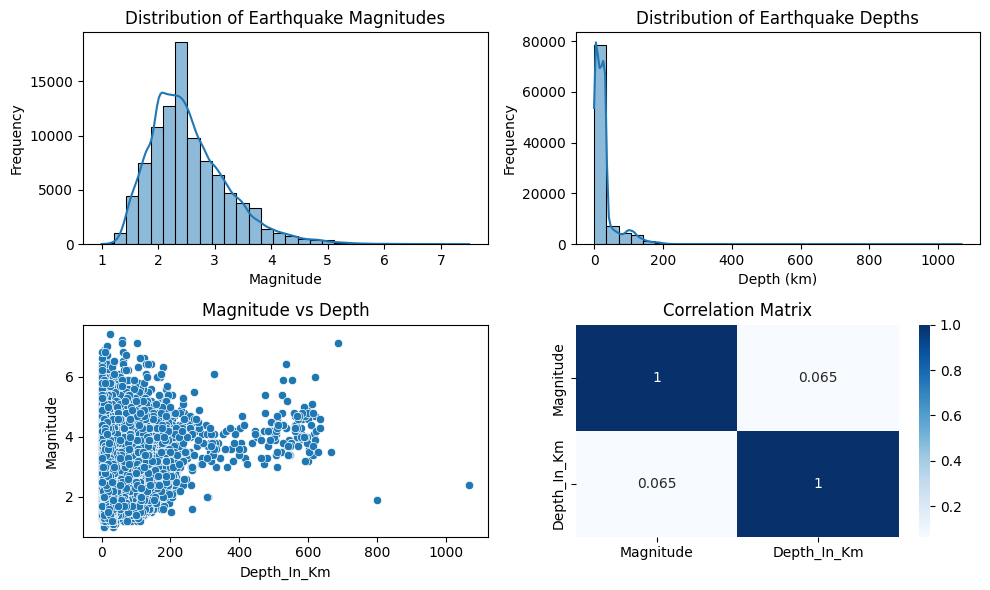

In [8]:
df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
titles = ['Distribution of Earthquake Magnitudes', 'Distribution of Earthquake Depths', 'Magnitude vs Depth', 'Correlation Matrix']
index  = ['Magnitude', 'Depth_In_Km']
xlabel = ['Magnitude', 'Depth (km)']

for i in range(2):
  sns.histplot(df[index[i]], kde=True, bins=30, ax=axes[0, i])
  axes[0, i].set_title(titles[i])
  axes[0, i].set_xlabel(xlabel[i])
  axes[0, i].set_ylabel('Frequency')

sns.scatterplot(x='Depth_In_Km', y='Magnitude', data=df, ax=axes[1,0])
axes[1,0].set_title(titles[2])

corr_matrix = df[['Magnitude','Depth_In_Km']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title(titles[3])

plt.tight_layout()
plt.show()

**Magnitude Distribution**

We plotted a histogram showing that most earthquakes fall between magnitude 2 and 3, with relatively fewer high-magnitude quakes (>5.0).
This skew suggests that while smaller quakes are frequent, major seismic events are relatively rare.

**Depth Distirbution**

A large concentration of quakes are **shallow** (under 50 km). However, there are occasional deeper quakes up to several hundred kilometers.

**Magnitude vs Depth**

We see no strong linear relationship (correlation ~0.065). Quakes of all depths can have a wide range of magnitudes. However, extremely deep quakes (e.g., >500 km) tend to be less frequent.

**Correlation Matrix**

A correlation of ~0.065 between Magnitude and Depth indicates weak correlation. This is consistent with the scatter plot.

#### **Key Insights**
- Earthquake magnitude doesn’t appear strongly tied to how deep it originates.
- The vast majority of quakes occur at shallow depths with moderate magnitudes.

### **Load Administrative Regions in the Philippines from Shapefiles**

In [9]:
# Load Shapefiles
import os

shapefile_path = '../data/philippines_shapefile/ph.shp'

ph_shape = gpd.read_file(shapefile_path).to_crs(epsg=4326)
ph_shape = ph_shape.drop(columns=['source'])
ph_shape = ph_shape.rename(index=str, columns={'name' : 'region_name'})

print(ph_shape)
print(ph_shape.crs)

      id                           region_name  \
0   PH11                                 Davao   
1   PH13                                Caraga   
2   PH10                     Northern Mindanao   
3   PH14  Autonomous Region in Muslim Mindanao   
4   PH09                   Zamboanga Peninsula   
5   PH41                              Mimaropa   
6   PH40                            Calabarzon   
7   PH08                       Eastern Visayas   
8   PH05                                 Bicol   
9   PH03                         Central Luzon   
10  PH02                        Cagayan Valley   
11  PH00               National Capital Region   
12  PH15      Cordillera Administrative Region   
13  PH01                                Ilocos   
14  PH07                       Central Visayas   
15  PH06                       Western Visayas   
16  PH12                          Soccsksargen   

                                             geometry  
0   MULTIPOLYGON (((125.77687 6.89403, 125.

### **Geospatial Analysis**

In [10]:
from matplotlib import cm, colors

def truncate_colormap(cmap, minval, maxval, n=256):
  new_cmap = colors.LinearSegmentedColormap.from_list(f"truncated({cmap.name},{minval},{maxval})", cmap(np.linspace(minval, maxval, n)))
  return new_cmap

truncated_cmap = truncate_colormap(cm.hot_r, minval=0.3, maxval=1)

                            region_name  quake_count
0  Autonomous Region in Muslim Mindanao          769
1                                 Bicol          876
2                        Cagayan Valley         1063
3                            Calabarzon         1451
4                                Caraga         4592


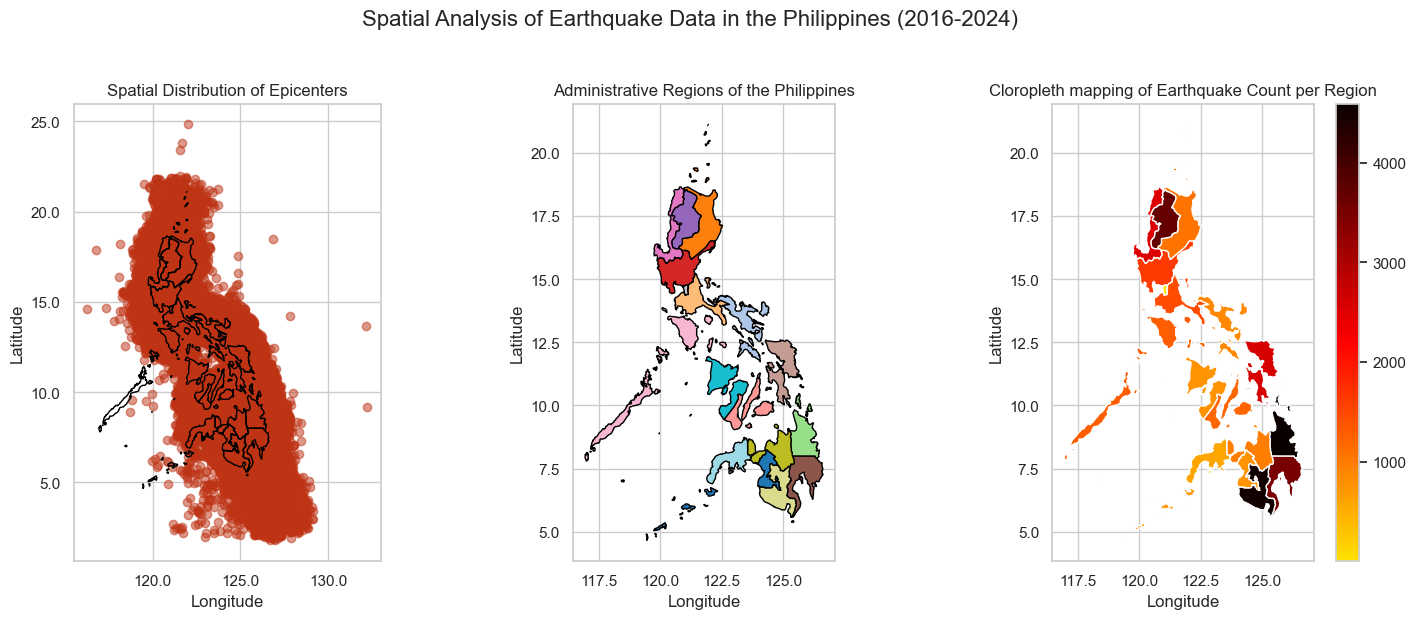

In [22]:
from matplotlib import ticker
from shapely.geometry import Point
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

filtered_df = df[(df['Longitude'] >= 100) & (df['Longitude'] <= 140)]
titles = ['Spatial Distribution of Epicenters', 'Administrative Regions of the Philippines', 'Cloropleth mapping of Earthquake Count per Region']

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf_quakes = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
gdf_joined = gpd.sjoin(gdf_quakes, ph_shape, how='left')
gdf_joined.dropna(subset=['region_name'], inplace=True)

quake_counts = gdf_joined.groupby('region_name').size().reset_index(name='quake_count')
print(quake_counts.head())

for i in range(3):
  if i == 0:
    axes[i].scatter(filtered_df['Longitude'], filtered_df['Latitude'], alpha=0.5/(4**i), c='#be3314')
    ph_shape.plot(ax=axes[i], facecolor='none', edgecolor='black')
  elif i == 1:
    ph_shape.plot(ax=axes[i], column='region_name', legend=i-1, cmap='tab20', edgecolor='black', legend_kwds={'bbox_to_anchor': (1.2, 1)})
  else: 
    ph_regions = ph_shape.merge(quake_counts, on='region_name', how='left')
    ph_regions.plot(column='quake_count', cmap=truncated_cmap, legend=True, figsize=(8,6), ax=axes[i])
    
  axes[i].set_xlabel('Longitude')
  axes[i].set_ylabel('Latitude')
  axes[i].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
  axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
  axes[i].set_title(titles[i])

fig.suptitle("Spatial Analysis of Earthquake Data in the Philippines (2016-2024)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

##### **Observation**

Most epicenters align with known fault lines or seismically active zones, forming a fairly continuous band along the archipelago. Particularly dense clusters appear around **Eastern Visayas, Mindanao, and certain areas of Luzon**.

We also aggregated quake counts by region: 
- **Caraga, Davao, and Eastern Visayas** show higher counts.
- Some northern regions (**Ilocos, Cagayan Valley**) are comparatively less dense, though still quake-prone.

#### **Time-Based Analysis**

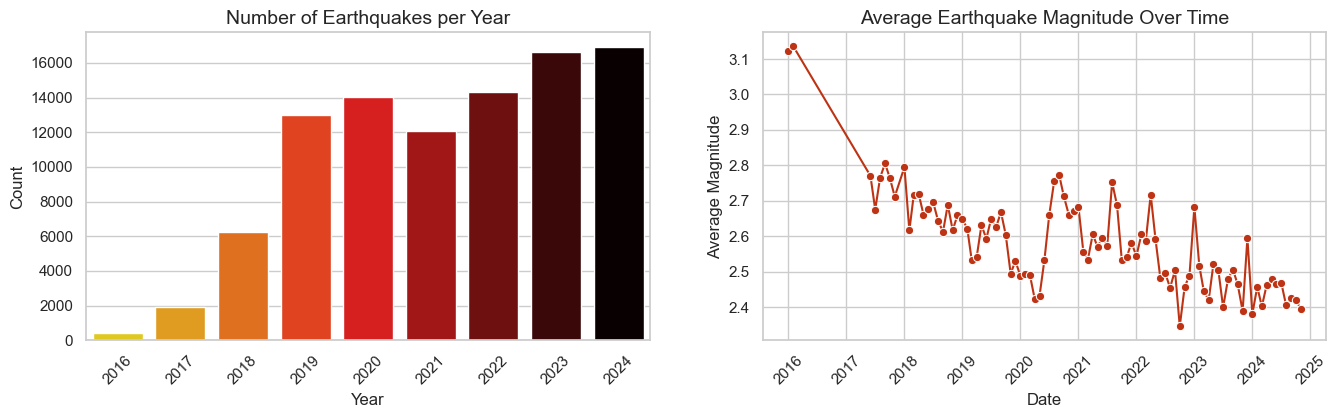

In [12]:
# Group earthquakes by year and by month
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month

yearly_counts = df.groupby('Year').size().reset_index(name='Count')
# Get the average magnitude by month
monthly_mag = df.groupby(['Year', 'Month'])['Magnitude'].mean().reset_index()
monthly_mag['date_index'] = pd.to_datetime(monthly_mag['Year'].astype(str) + '-' + monthly_mag['Month'].astype(str) + '-01')

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.barplot(data=yearly_counts, x='Year', y='Count', ax=axes[0], palette=truncated_cmap, hue='Year', legend=False)
axes[0].set_title("Number of Earthquakes per Year", fontsize=14)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=monthly_mag, x='date_index', y='Magnitude', ax=axes[1], marker='o', color='#be3314')
axes[1].set_title("Average Earthquake Magnitude Over Time", fontsize=14)
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Average Magnitude", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

##### **Observation**

There is a general increase in recorded quakes over time, which may reflect **increased seismic detection or actual seismic activity changes**. We also see mild fluctuations (not a strong seasonal pattern) in the monthly magnitude trends, though certain months/years show slightly higher average magnitudes.

#### **Depth Analysis**

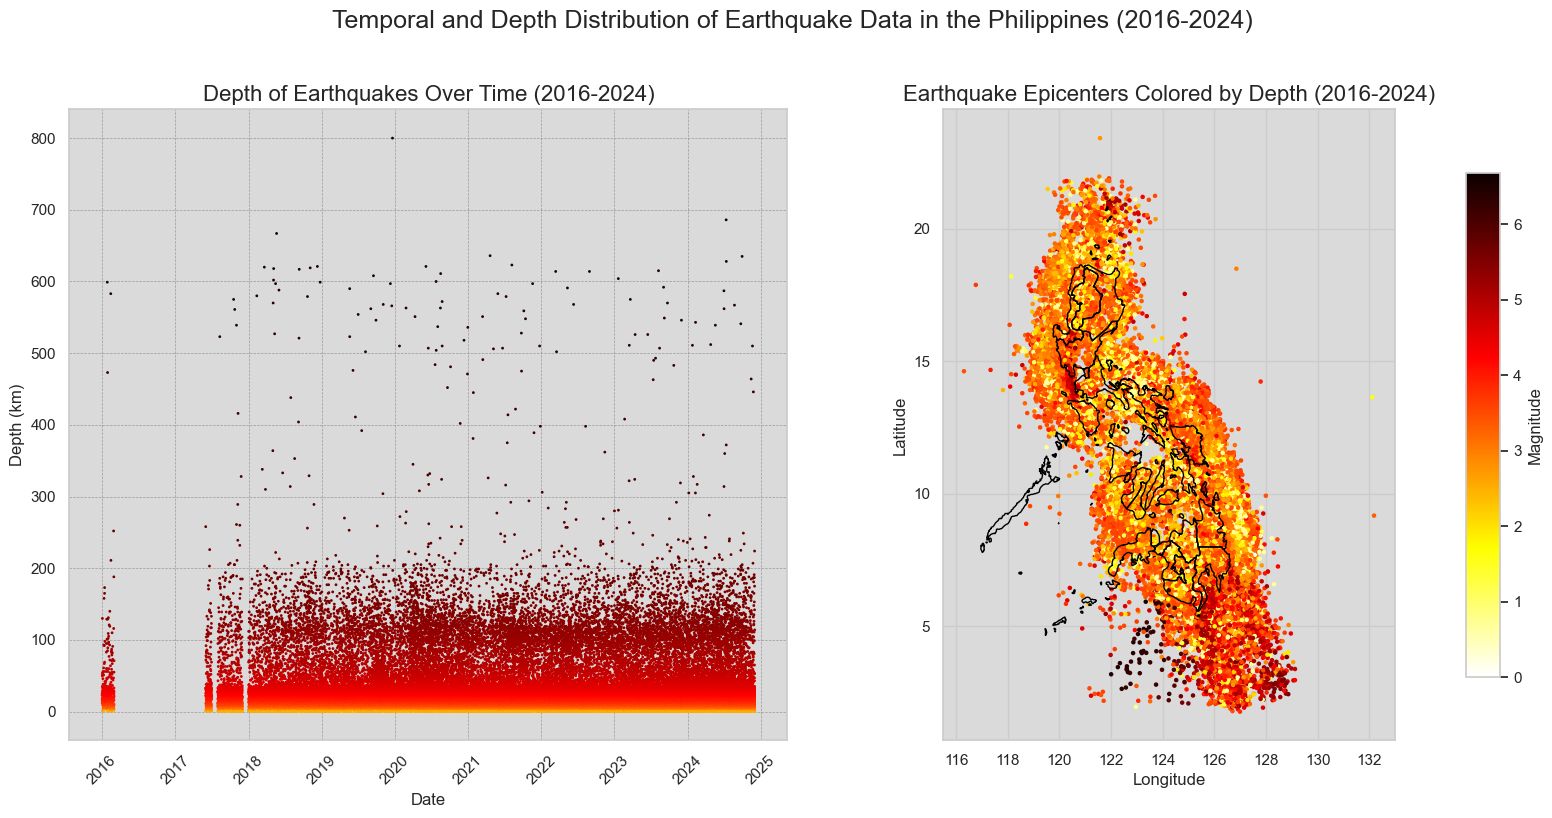

In [25]:
filtered_df = filtered_df.sort_values(by='Date_Time').copy()
filtered_depth = filtered_df[filtered_df['Depth_In_Km'] <= 800].copy()
filtered_depth['Log_Depth'] = np.log1p(filtered_depth['Depth_In_Km'])

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121)  
ax1.scatter( filtered_depth['Date_Time'],  filtered_depth['Depth_In_Km'], c= filtered_depth['Log_Depth'], cmap=truncated_cmap, s=1)
ax1.set_title("Depth of Earthquakes Over Time (2016-2024)", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Depth (km)", fontsize=12)
ax1.set_facecolor('#dadada')
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(122)
sc = ax2.scatter(filtered_depth['Longitude'], filtered_depth['Latitude'], c=filtered_depth['Log_Depth'], cmap='hot_r', s=5)
ph_shape.plot(ax=ax2, facecolor='none', edgecolor='black')
ax2.set_title("Earthquake Epicenters Colored by Depth (2016-2024)", fontsize=16)
ax2.set_xlabel("Longitude", fontsize=12)
ax2.set_ylabel("Latitude", fontsize=12)
ax2.set_facecolor('#dadada')
cbar = fig.colorbar(sc, shrink=0.8, aspect=15, pad=0.1)
cbar.set_label("Magnitude", fontsize=12)

fig.suptitle("Temporal and Depth Distribution of Earthquake Data in the Philippines (2016-2024)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

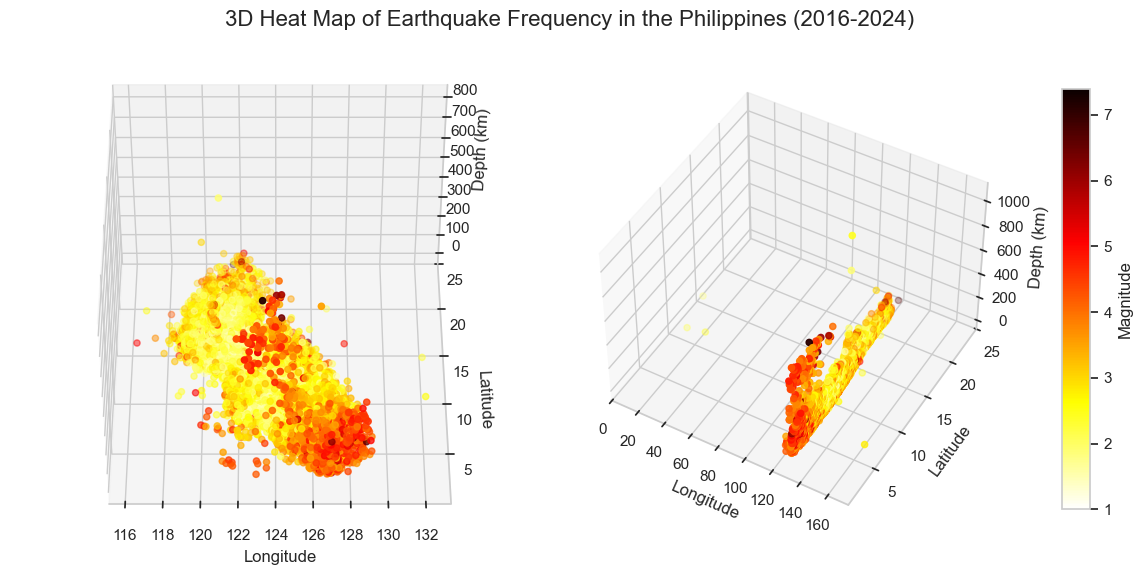

In [393]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(filtered_depth['Longitude'], filtered_depth['Latitude'], filtered_depth['Depth_In_Km'], c=filtered_depth['Magnitude'], cmap='hot_r')
ax1.view_init(45,270,0)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Depth (km)')

ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df['Longitude'], df['Latitude'], df['Depth_In_Km'], c=df['Magnitude'], cmap='hot_r')
ax2.view_init(45,300,0)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Depth (km)')

cbar = fig.colorbar(sc2, shrink=0.8, aspect=15, pad=0.1)
cbar.set_label("Magnitude", fontsize=12)

fig.suptitle("3D Heat Map of Earthquake Frequency in the Philippines (2016-2024)", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

##### **Observation**

It is observed that over the span of 8 years, most earthquakes are under 50 km consistently, with random spatterings of deeper events. There is a weak correlation between the magnitude and the depth, which indicates that magnitude alone doesn’t predict how deep a quake is.

Outliers in the figures indicate that there are occasional extremely deep quakes (~700–1000 km) or high magnitudes (6.0+) scattered throughout the dataset. 

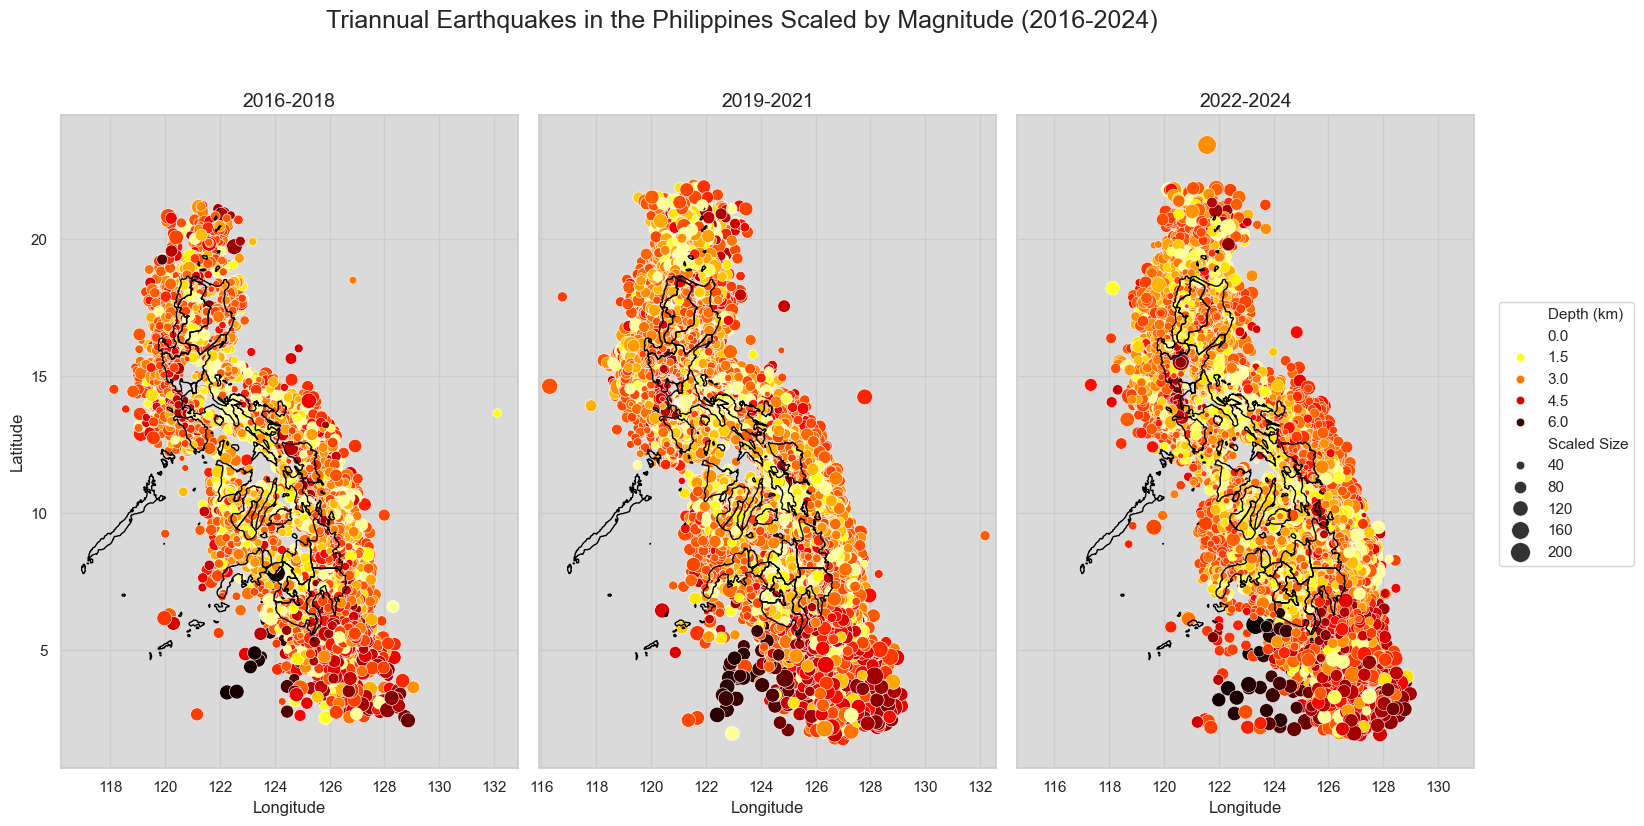

In [20]:
# filtered_depth['Size_Factor'] = (filtered_depth['Magnitude'] * filtered_depth['Depth_In_Km'] / filtered_depth['Depth_In_Km'].max())
filtered_depth['Size_Factor'] = filtered_depth['Magnitude'] / filtered_depth['Magnitude'].max()
min_size, max_size = 1, 200
size_min = filtered_depth['Size_Factor'].min()
size_max = filtered_depth['Size_Factor'].max()

filtered_depth['Scaled_Size'] = ((filtered_depth['Size_Factor'] - size_min) / (size_max - size_min) * (max_size - min_size) + min_size)

fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
time_ranges = [(2016, 2018), (2019, 2021), (2022, 2024)]
titles = ["2016-2018", "2019-2021", "2022-2024"]

last_scatter = None
for i, (start_year, end_year) in enumerate(time_ranges):
  ax = axes[i]
  subset = filtered_depth[(filtered_depth['Date_Time'].dt.year >= start_year) & (filtered_depth['Date_Time'].dt.year <= end_year)]

  scatter = sns.scatterplot(data=subset, x='Longitude', y='Latitude', size='Scaled_Size', hue='Log_Depth', 
    palette='hot_r', sizes=(min_size, max_size), ax=ax
  )
  ph_shape.plot(ax=ax, facecolor='none', edgecolor='black')

  ax.set_facecolor('#dadada')
  ax.set_title(titles[i], fontsize=14)
  ax.set_xlabel("Longitude", fontsize=12)
  ax.set_ylabel("Latitude", fontsize=12)
  ax.set_aspect('equal', adjustable='datalim')
  ax.legend([], [], frameon=False)
  last_scatter = scatter

if last_scatter:
  handles, labels = last_scatter.get_legend_handles_labels()
  labels = [label.replace("Log_Depth", "Depth (km)").replace("Scaled_Size", "Scaled Size") for label in labels]
  fig.legend(handles=handles, labels=labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

fig.suptitle("Triannual Earthquakes in the Philippines Scaled by Magnitude (2016-2024)", fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

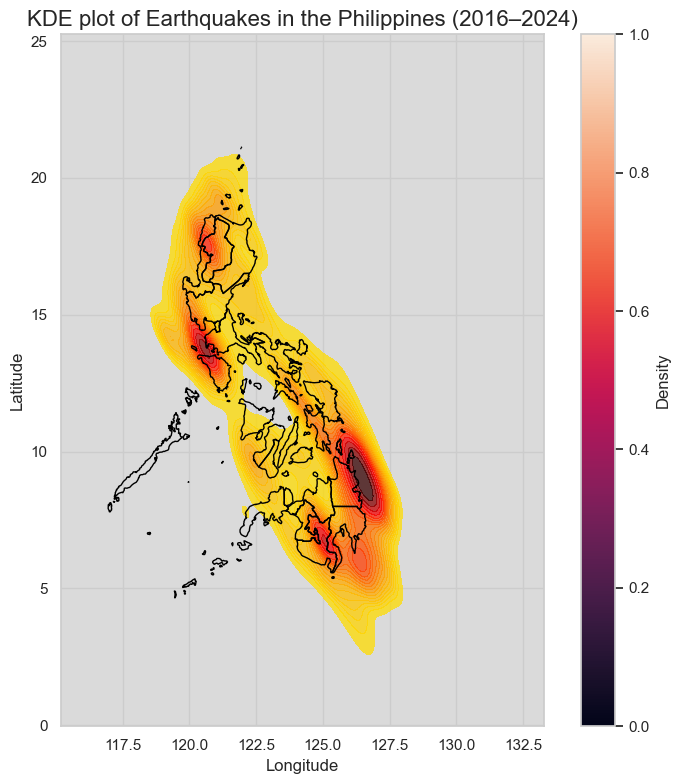

In [24]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
# Kernel Density Contours for quake locations
kde_plot = sns.kdeplot(data=filtered_depth, x='Longitude', y='Latitude', fill=True, levels=20, cmap=truncated_cmap, alpha=0.75)
ph_shape.plot(ax=ax, facecolor='none', edgecolor='black')

norm = kde_plot.collections[-1].norm
cmap = kde_plot.collections[-1].cmap
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([]) 
cbar = plt.colorbar(mappable, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Density")

ax.set_facecolor('#dadada')
ax.set_title("KDE plot of Earthquakes in the Philippines (2016–2024)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()


##### **Key Takeaways**
Our EDA reveals that earthquake activity in the Philippines (2016–2024) predominantly features shallow (0–50 km) quakes with magnitudes around 2–3. Nevertheless, higher magnitude events (above 5.0) do occur, especially in certain active regions. The data shows modest year-over-year increases in recorded quakes, though it’s unclear whether this is due to actual seismic trends or improved detection/reporting. It is important to note, however, that we’re only analyzing lat/long, magnitude, depth, and date/time; other geophysical factors remain unexplored.